##### 1.Visualization of U,S, and V for Singular Value Decomposition of a square matrix M, where m=n

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'RdBu_r'

In [2]:
PRECISION = 3

def svd(M):
    """Returns the Singular Value Decomposition of M (via numpy), with all components returned in 
    matrix format
    """
    U, s, Vt = np.linalg.svd(M)
    
    # Put the vector singular values into a padded matrix
    S = np.zeros(M.shape)
    np.fill_diagonal(S, s)
    
    # Rounding for display
    return np.round(U, PRECISION), np.round(S, PRECISION), np.round(Vt.T, PRECISION)

In [31]:
def visualize_svd(m, n, fig_height=5):
           
    """Show the Singular Value Decomposition of a random matrix of size `m x `n
    Parameters
    ----------
    m : int, The number of rows in the random matrix
    n : int, The number of columns
    fig_height : float, Fiddle parameter to make figures render better(because I'm lazy and
                        don't want to work out the scaling arithmetic)."""
    
    np.random.seed(3)
    
    M = np.random.randn(m, n)
    U, S, V = svd(M)
    
    # Visualization
    fig, axs = plt.subplots(1, 7, figsize=(12, fig_height))
    
    plt.sca(axs[0])
    plt.imshow(M)
    plt.title(f"$M \\in \\mathbb{{R}} ^{{{m} \\times {n}}}$", fontsize=14)
    
    plt.sca(axs[1])
    plt.text(0.25, 0.4, '=', fontsize=48)
    plt.axis('off')
    
    plt.sca(axs[2])
    plt.imshow(U)
    plt.title(f"$U \\in \\mathbb{{R}} ^{{{m} \\times {n}}}$", fontsize=14)
    
    plt.sca(axs[3])
    plt.text(0.25, 0.4, "$\\times$", fontsize=48)
    plt.axis('off')
    
    plt.sca(axs[4])
    plt.imshow(S)
    plt.title(f"$S \\in \\mathbb{{R}} ^{{{m} \\times {n}}}$", fontsize=14)
    
    plt.sca(axs[5])
    plt.text(0.25, 0.4, '$\\times$', fontsize=48)
    plt.axis('off')
    
    plt.sca(axs[6])
    cmap = plt.imshow(V.T)
    plt.colorbar(cmap, ax=axs, orientation='horizontal', aspect=50)
    plt.title(f"$V^T \\in \\mathbb{{R}} ^{{{m} \\times {n}}}$", fontsize=14)
    
    plt.suptitle(f"SVD Components $m={m}, n={n}$", fontsize=18)
    
    fname = f"../Image/svd-{m}x{n}.png"
    plt.savefig(fname, bbox_inches='tight', dpi=300)
    print(fname)

In [30]:
import os
print(os.getcwd())

e:\딥러닝입문\순환신경망


../Image/svd-4x4.png


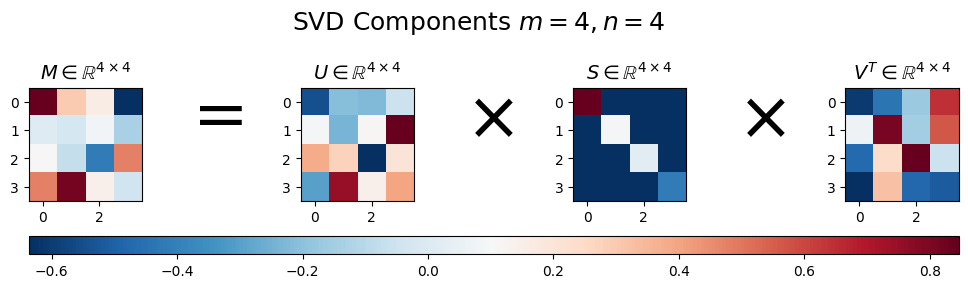

In [32]:
visualize_svd(4, 4, fig_height=3)

##### Visualization of U,S,and V for SVD of a tall matrix M, where m>n

In [5]:
np.random.seed(3)    
M = np.random.randn(4, 4)
print(M)

[[ 1.78862847  0.43650985  0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898 -0.08274148 -0.62700068]
 [-0.04381817 -0.47721803 -1.31386475  0.88462238]
 [ 0.88131804  1.70957306  0.05003364 -0.40467741]]


In [14]:
x, y, z = svd(M)
print(x, '\n')
print(y, '\n')
print(z)

[[-0.801 -0.392 -0.405 -0.2  ]
 [-0.022 -0.425  0.007  0.905]
 [ 0.332  0.208 -0.913  0.113]
 [-0.498  0.789  0.043  0.358]] 

[[3.107 0.    0.    0.   ]
 [0.    1.523 0.    0.   ]
 [0.    0.    1.373 0.   ]
 [0.    0.    0.    0.468]] 

[[-0.605  0.067 -0.472 -0.637]
 [-0.435  0.807  0.24   0.32 ]
 [-0.173 -0.155  0.846 -0.479]
 [ 0.644  0.566 -0.055 -0.512]]


In [13]:
yz = np.dot(y, z)
print(yz, '\n')
xyz = np.dot(x, yz)
print(xyz)

[[-1.879735  0.208169 -1.466504 -1.979159]
 [-0.662505  1.229061  0.36552   0.48736 ]
 [-0.237529 -0.212815  1.161558 -0.657667]
 [ 0.301392  0.264888 -0.02574  -0.239616]] 

[[ 1.80129054 -0.61532281  0.56610287  1.70853957]
 [ 0.59401585 -0.28869671 -0.13824671 -0.38504265]
 [-0.51095179  0.54898923 -1.47426224  0.01766345]
 [ 0.51107617  0.95173983  1.05944635  1.25608601]]


In [12]:
xy = np.dot(x, y)
print(xy, '\n')
xyz = np.dot(xy, z)
print(xyz)

[[-2.488707 -0.597016 -0.556065 -0.0936  ]
 [-0.068354 -0.647275  0.009611  0.42354 ]
 [ 1.031524  0.316784 -1.253549  0.052884]
 [-1.547286  1.201647  0.059039  0.167544]] 

[[ 1.80129054 -0.61532281  0.56610287  1.70853957]
 [ 0.59401585 -0.28869671 -0.13824671 -0.38504265]
 [-0.51095179  0.54898923 -1.47426224  0.01766345]
 [ 0.51107617  0.95173983  1.05944635  1.25608601]]


In [25]:
R, m = 10, 4
print(f"$U \\in \\mathbb{R}^{m} \\times {m}$")

$U \in \mathbb10^4 \times 4$


In [16]:
np.random.seed(123)

M = np.random.randn(5, 4)
print(M)
print()

U, s, Vt = np.linalg.svd(M)
print(f"U shape : {U.shape},  s shape : {s.shape},  Vt shape : {Vt.shape}")
print()

print(s)
print()

S = np.zeros(M.shape)
np.fill_diagonal(S, s)
print(S)

[[-1.0856306   0.99734545  0.2829785  -1.50629471]
 [-0.57860025  1.65143654 -2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404  -0.67888615 -0.09470897]
 [ 1.49138963 -0.638902   -0.44398196 -0.43435128]
 [ 2.20593008  2.18678609  1.0040539   0.3861864 ]]

U shape : (5, 5),  s shape : (4,),  Vt shape : (4, 4)

[3.42555004 3.17379117 2.5402854  1.42968271]

[[3.42555004 0.         0.         0.        ]
 [0.         3.17379117 0.         0.        ]
 [0.         0.         2.5402854  0.        ]
 [0.         0.         0.         1.42968271]
 [0.         0.         0.         0.        ]]


In [ ]:
def visualize_svd(m, n, fig_height=5):
           
    """Show the Singular Value Decomposition of a random matrix of size `m x `n
    Parameters
    ----------
    m : int, The number of rows in the random matrix
    n : int, The number of columns
    fig_height : float, Fiddle parameter to make figures render better(because I'm lazy and
                        don't want to work out the scaling arithmetic).
    """
    np.random.seed(123)
    
    # Generate a random matrix
    M = np.random.randn(m, n)
    
    # Run SVD
    U, S, V = svd(M)
    
    # Visulaization
    fig, axs = plt.subplots(1, 7, figsize=(12, fig_height))
    
    plt.sca(axs[0])  # Set the current Axes to axs[0] and the current Figure to the parent of axs[0].
    plt.imshow(M)
    # plt.title(f"$M \\in \\mathbb^{m} \\times {n}$", fontsize=14)
    
    plt.sca(axs[1])
    # plt.text(.25, .25, '=', fontsize=48)
    plt.axis('off')
    
    plt.sca(axs[2])
    plt.imshow(U)
    # plt.title(f"$U \\in \\mathbb{R}^{m} \\times {m}$", fontsize=14)
    
    plt.sca(axs[3])
    # plt.text(.25, .25, '$\\times$', fontsize=48)
    plt.axis('off')
    
    plt.sca(axs[4])
    plt.imshow(S)
    # plt.title(f"$S \\in \\mathbb{R}^{m} \\times {n}$")
    
    plt.sca(axs[5])
    # plt.text(.25, .25, '$\\times$', fontsize=48)
    plt.axis('off')
    
    plt.sca(axs[6])
    cmap = plt.imshow(V.T)
    plt.colorbar(cmap, ax=axs, orientation='horizontal', aspect=50)
    # plt.title(f"SVD Components $m={m}, n={n}$", fontsize=18)
    
    # fname = f"/tmp/svd-{m}x{n}.png"
    # plt.savefig(fname, bbox_inches='tight', dpi=300)
    # print(fname)